<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

# 4.데이터프레임 집계

- 상세 데이터가 아닌 집계된 데이터에 대한 분석을 자주 요구하니 익숙해져야 할 내용입니다.
- sum(), mean(), max(), min(), count() 메서드를 사용해 지정한 열 또는 열들을 기준으로 집계합니다.
- 평균을 구하는 메서드가 avg()가 아닌 mean() 임을 주의하기 바랍니다.

In [5]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips.csv'
tip = pd.read_csv(path)

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- 우선 집계에 대하여 다음과 같이 정리해 볼 수 있습니다.

<img src='https://raw.githubusercontent.com/jangrae/img/master/groupby.png' width=500 align="left"/>

- **연속값**, **범주값**이라는 용어에 익숙해 지길 바랍니다.
- 대부분은 범주값을 기준으로 연속값의 합, 평균 등을 집계합니다.
- 가끔은 범주값의 개수나 최빈값을 집계하기도 합니다.
- 집계 결과에 대한 시각화를 통해 더 나은 통찰력을 얻게 합니다.

## 4.1.합 구하기

### 4.1.1.열 하나 집계

- 우선 특정 열의 값 합은 다음과 같이 구할 수 있습니다.

In [17]:
# total_bill 합계
tip.loc[:,'total_bill'].sum()

,day,tip
0,Fri,51.96
1,Sat,260.40
2,Sun,247.39
3,Thur,171.83


In [29]:
# total_bill, tip 각각의 합계  / 모든 행을 더한 것이기에 axis = 0

tip.loc[:,['total_bill','tip']].sum(axis = 0)

total_bill    4827.77
tip            731.58
dtype: float64

**1) 집계하기**

- 만일 day 별로 합을 구하고자 한다면 다음과 같이 합니다.
- 아래 결과 값 네 개를 더하면 전체 합이 됩니다.
- **as_index=True**를 설정(기본값)하면 집계 기준이 되는 열이 인덱스 열이 됩니다.
- 집계 결과가 tip 열만 가지니 시리즈가 됩니다.

In [19]:
# day별 tip 합계 --> 시리즈
tip.groupby('day',as_index = False)['tip'].sum()


,day,tip
0,Fri,51.96
1,Sat,260.40
2,Sun,247.39
3,Thur,171.83


In [31]:
# day별 tip 합계 --> 시리즈 , day를 index로 집계  , 열 요소밖에 안남기에 Series 형 반환 

tip.groupby('day',as_index = True)['tip'].sum()

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

- **[['tip']].sum()** 과 같이 하면 열이 여럿이라는 의미여서 결과가 **데이터프레임**이 됩니다.

In [35]:
# day별 tip 합계 --> 데이터프레임
tip.groupby('day',as_index = True)[['tip','total_bill']].sum()

,tip,total_bill
day,,
Fri,51.96,325.88
Sat,260.40,1778.40
Sun,247.39,1627.16
Thur,171.83,1096.33


- **as_index=False**를 설정하면 행 번호를 기반으로 한 정수 값이 인덱스로 설정됩니다.

In [37]:
# day별 tip 합계 --> 데이터프레임
tip.groupby('day',as_index = False)[['tip','total_bill']].sum()

,day,tip,total_bill
0,Fri,51.96,325.88
1,Sat,260.40,1778.40
2,Sun,247.39,1627.16
3,Thur,171.83,1096.33


**2) 데이터프레임으로 선언**

- 집계 결과를 새로운 데이터프레임으로 선언하여 사용하는 경우가 많습니다.
- 집계된 결과를 반복해서 사용하거나, 분석 대상이 되는 경우 데이터프레임으로 선언함이 유익합니다.

In [39]:
# day별 tip 합계 조회
tip_sum = tip.groupby('day',as_index = False)['tip'].sum()

# 확인
tip_sum

,day,tip
0,Fri,51.96
1,Sat,260.40
2,Sun,247.39
3,Thur,171.83


**3) 집계 결과 시각화**

- 위 과정으로 집계한 결과를 막대그래프로 간단히 시각화 해봅니다.
- matplotlib 패키지의 pyplot을 plt 별칭을 주어 불러와 시각화에 사용합니다.

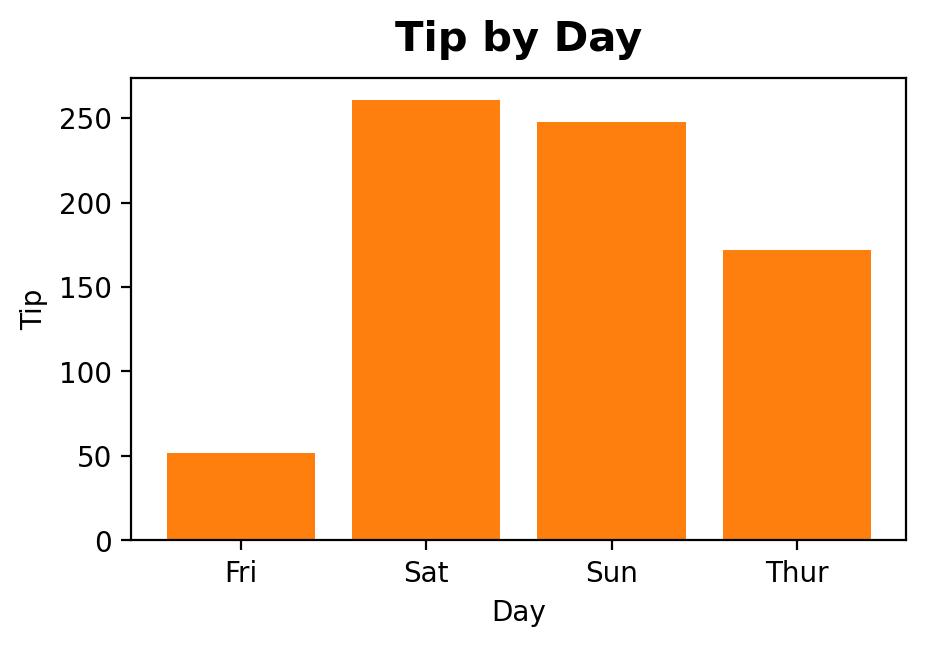

In [81]:
# 라이브러리 불러오기

%config InlineBackend.figure_format = 'retina'# 글자 선명하게(선택)

# day 별 tip 비교 시각화
plt.figure(figsize =(5,3))
plt.bar(tip_sum['day'], tip_sum['tip'],color = 'tab:orange')
#plt.bar(x=tip_sum['day'], height = tip_sum['tip'],color = 'tab:orange')
plt.title('Tip by Day', size = 15, pad = 10, fontweight = 'bold')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

- plt.bar() 대신 plt.barh() 함수를 사용해 가로 막대그래프를 표시할 수 있습니다.

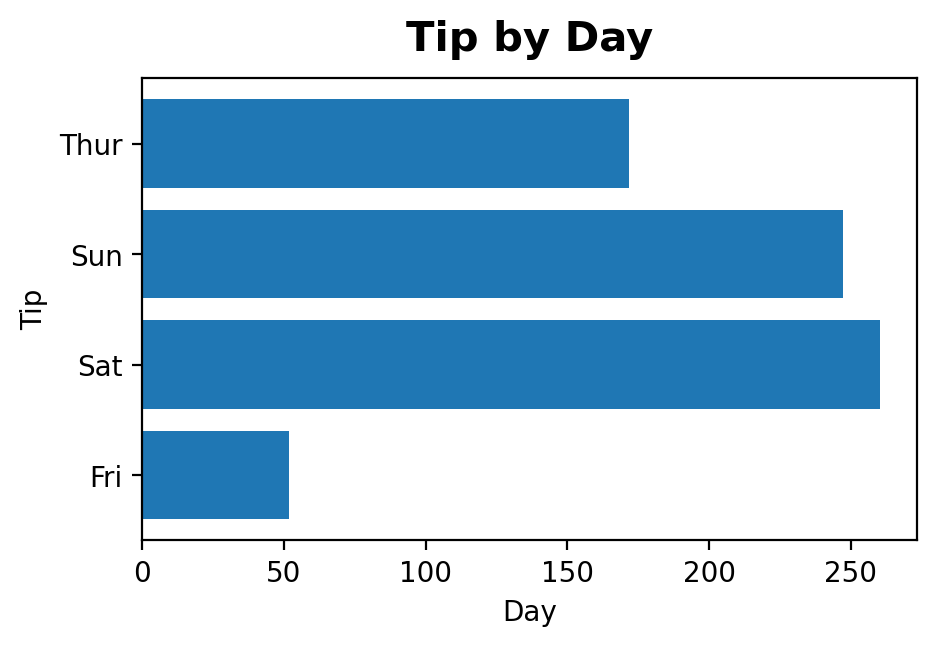

In [71]:
# day 별 tip 비교 시각화

%config InlineBackend.figure_format = 'retina'# 글자 선명하게(선택)

# day 별 tip 비교 시각화
plt.figure(figsize =(5,3))
plt.barh(tip_sum['day'], tip_sum['tip'])
#plt.barh(y= tip_sum['day'], width = tip_sum['tip'])
plt.title('Tip by Day', size = 15, pad = 10, fontweight = 'bold')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

**4) 참고: 선 그래프**

- 연속형 값의 변화 추이를 볼 때 선 그래프가 유용합니다.

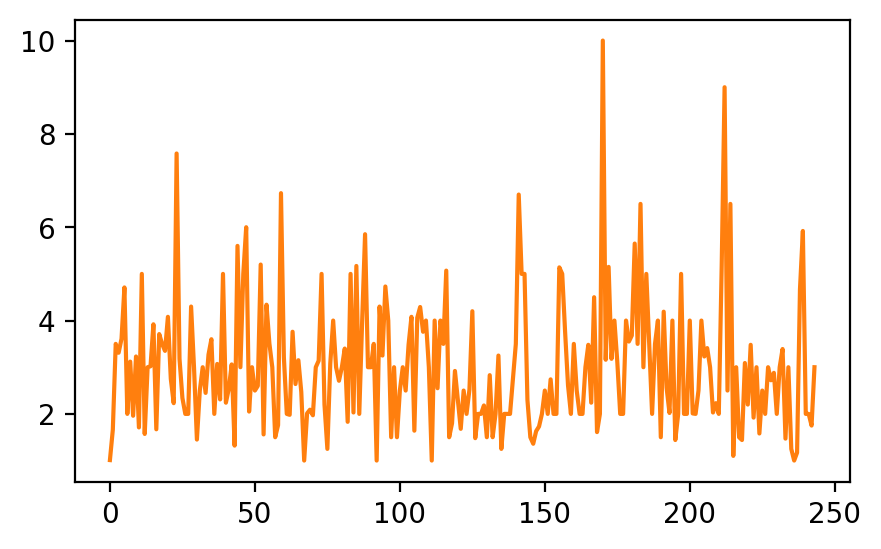

In [89]:
# tip 변경 추이 시각화
plt.figure(figsize =(5,3))
plt.plot(tip['tip'],color = 'tab:orange')
plt.show()


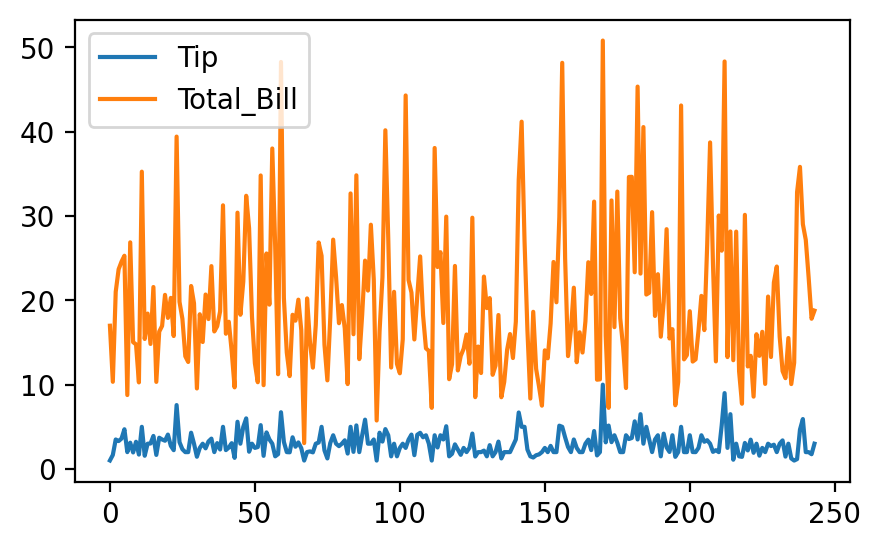

In [117]:
plt.figure(figsize =(5,3))
plt.plot(tip[['tip','total_bill']])

plt.legend(['Tip','Total_Bill']) #, loc='upper right')
plt.show()


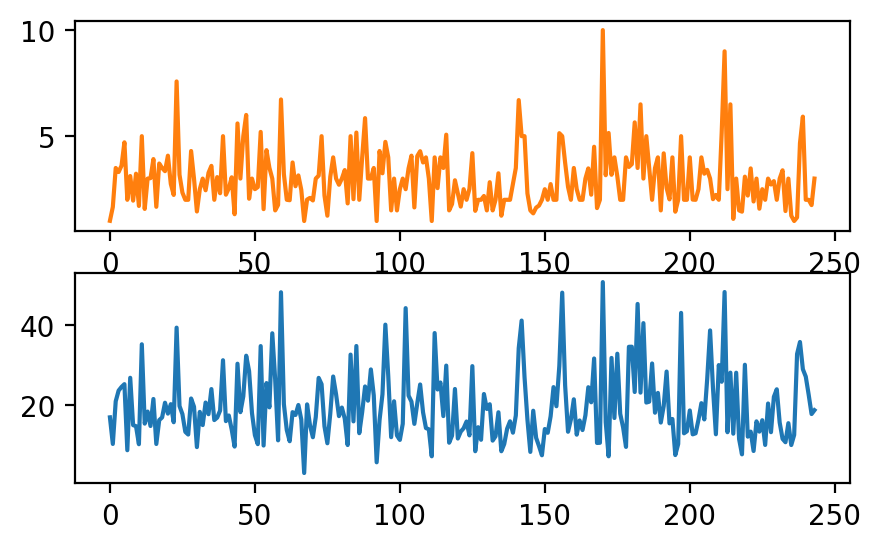

In [95]:
# tip, total_bill 변경 추이 시각화

plt.figure(figsize =(5,3))
plt.subplot(2,1,1)
plt.plot(tip['tip'],color = 'tab:orange')
plt.subplot(2,1,2)
plt.plot(tip['total_bill'],color = 'tab:blue')
plt.show()




**5) 참고: 히스토그램**

- 연속형 값의 분포를 볼 때는 히스토그램이 유용합니다.

2.99827868852459


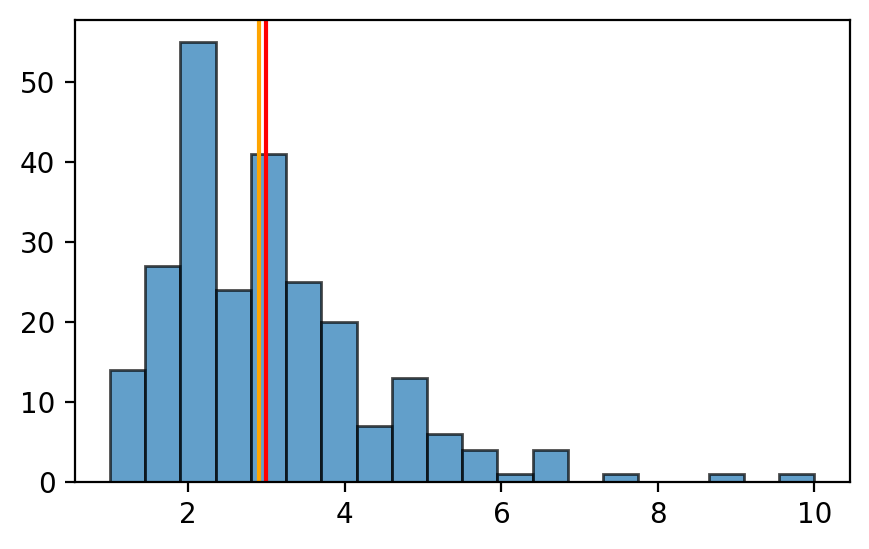

In [139]:
# tip 분포 시각화
print(tip['tip'].mean())


plt.figure(figsize =(5,3))
plt.hist(tip['tip'], bins =20,alpha=0.7,ec= 'k' )
plt.axvline(tip['tip'].mean(), color = 'r') # 히스토그램에 vertex 에 선 그리기
plt.axvline(tip['tip'].median(), color = 'orange') # 히스토그램에 vertex 에 선 그리기
plt.show()



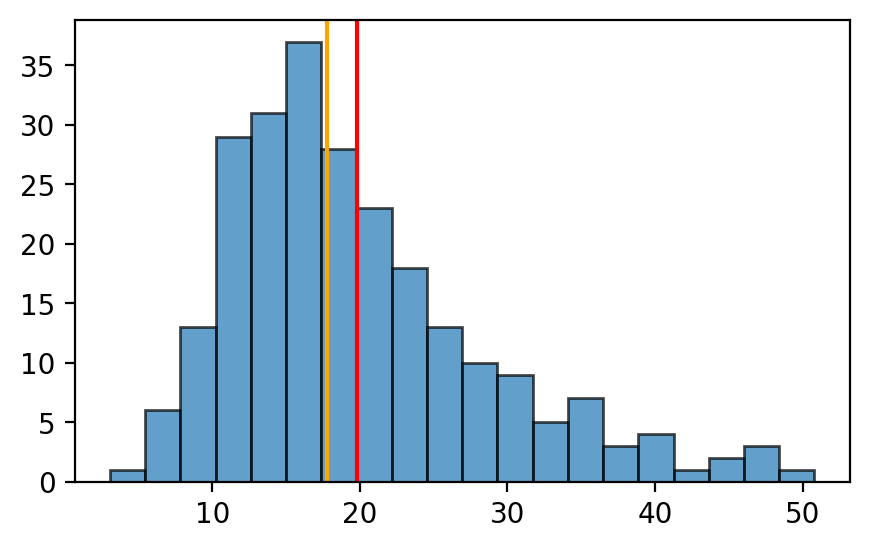

In [145]:
# total_bill 분포 시각화
plt.figure(figsize =(5,3))
plt.hist(tip['total_bill'], bins =20,alpha=0.7,ec= 'k' )
plt.axvline(tip['total_bill'].mean(), color = 'r') # 히스토그램에 vertex 에 선 그리기
plt.axvline(tip['total_bill'].median(), color = 'orange') # 히스토그램에 vertex 에 선 그리기
# plt.axhline(25) y 축에 그리기 
plt.show()


**6. 참고) 산점도**

- 두 열 사이의 상관관계를 확인하는 용도로 사용합니다.

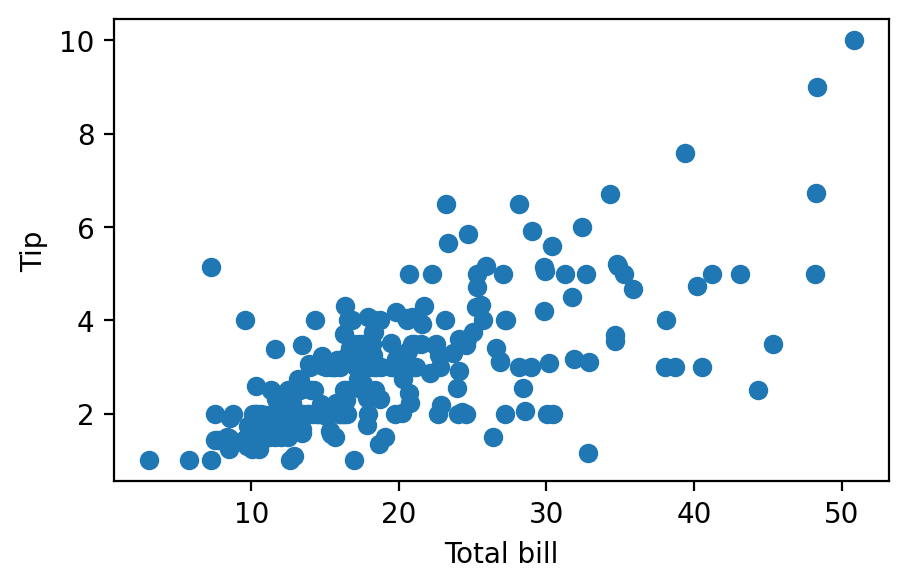

In [153]:
plt.figure(figsize =(5,3))
plt.scatter(tip['total_bill'],tip['tip'])
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

### 4.1.2.여러 열 집계

- 여러 열에 대한 집계를 같이 할 수 있습니다.
- **[ ['total_bill', 'tip'] ].sum()** 형태와 같이 집계 대상 열을 리스트로 지정합니다.

In [155]:
# day별 total_bill, tip 합계 조회

tip_sum = tip.groupby(by = 'day',as_index = False)[['tip','total_bill']].sum()

# 확인
tip_sum

,day,tip,total_bill
0,Fri,51.96,325.88
1,Sat,260.40,1778.40
2,Sun,247.39,1627.16
3,Thur,171.83,1096.33


- sum() 메서드 앞에 아무 열도 지정하지 않으면 **기준열 이외의 모든 열에 대한 집계**가 수행됩니다.

In [157]:
# day별 나머지 열들 합계 조회
tip_sum = tip.groupby(by = 'day',as_index = False).sum()

# 확인
tip_sum # 범주형의 경우 무지성으로 sum 하게 될 경우 문제가 발생 


,day,total_bill,tip,sex,smoker,time,size
0,Fri,325.88,51.96,MaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMale...,YesNoYesYesNoYesYesYesYesNoYesYesYesYesYesNoYe...,DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...,40
1,Sat,1778.40,260.40,MaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFe...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYe...,DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...,219
2,Sun,1627.16,247.39,FemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMa...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...,216
3,Thur,1096.33,171.83,MaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMa...,NoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,LunchLunchLunchLunchLunchLunchLunchLunchLunchL...,152


In [159]:
# 연속형 변수들만 sum 하도록 옵션 추가 
tip_sum = tip.groupby(by = 'day',as_index = False).sum(numeric_only= True)

# 확인
tip_sum

,day,total_bill,tip,size
0,Fri,325.88,51.96,40
1,Sat,1778.40,260.40,219
2,Sun,1627.16,247.39,216
3,Thur,1096.33,171.83,152


- **by=['day', 'smoker']** 과 같이 집계 기준 열을 여럿 설정할 수도 있습니다.

In [161]:
# day + smoker별 나머지 열들 합계 조회
tip_sum =tip.groupby(by = ['day','smoker'],as_index = False).sum(numeric_only= True)

# 확인
tip_sum

,day,smoker,total_bill,tip,size
0,Fri,No,73.68,11.25,9
1,Fri,Yes,252.20,40.71,31
2,Sat,No,884.78,139.63,115
3,Sat,Yes,893.62,120.77,104
4,Sun,No,1168.88,180.57,167
5,Sun,Yes,458.28,66.82,49
6,Thur,No,770.09,120.32,112
7,Thur,Yes,326.24,51.51,40


## 4.2.평균, 최댓값, 최솟값, 개수 구하기

- 위와 동일한 방법으로 평균, 최댓값, 최솟값, 개수를 집계할 수 있습니다.
- sum() 메서드 대신 관련된 메서드만 적절히 지정하면 됩니다.

**1) 평균 구하기**

In [165]:
# day별 tip 평균
tip_mean =tip.groupby(by = 'day',as_index = False).mean(numeric_only= True)

# 확인
tip_mean

,day,total_bill,tip,size
0,Fri,17.151579,2.734737,2.105263
1,Sat,20.441379,2.993103,2.517241
2,Sun,21.410000,3.255132,2.842105
3,Thur,17.682742,2.771452,2.451613


In [167]:
# day + sex 별 나머지 모든 열 평균
tip_mean =tip.groupby(by = ['day','sex'],as_index = False).mean(numeric_only= True)

# 확인
tip_mean

,day,sex,total_bill,tip,size
0,Fri,Female,14.145556,2.781111,2.111111
1,Fri,Male,19.857000,2.693000,2.100000
2,Sat,Female,19.680357,2.801786,2.250000
3,Sat,Male,20.802542,3.083898,2.644068
4,Sun,Female,19.872222,3.367222,2.944444
5,Sun,Male,21.887241,3.220345,2.810345
6,Thur,Female,16.715312,2.575625,2.468750
7,Thur,Male,18.714667,2.980333,2.433333


**2) 최댓값, 최솟값, 개수 구하기**


In [169]:
# day별 tip 최댓값
tip_max =tip.groupby(by = 'day',as_index = False).max(numeric_only= True)

# 확인
tip_max

,day,total_bill,tip,size
0,Fri,40.17,4.73,4
1,Sat,50.81,10.00,5
2,Sun,48.17,6.50,6
3,Thur,43.11,6.70,6


In [173]:
# day별 tip 최솟값
tip_min =tip.groupby(by = 'day',as_index = False).min(numeric_only= True)

# 확인
tip_min

,day,total_bill,tip,size
0,Fri,5.75,1.00,1
1,Sat,3.07,1.00,1
2,Sun,7.25,1.01,2
3,Thur,7.51,1.25,1
